# Coursera Assignment

**Question 1: Use yfinance to Extract Stock Data**

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function.

In [1]:
import yfinance as yf
# Download historical data for a stock
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


**Question 2: Use Webscraping to Extract Tesla Revenue Data**

Display the last five rows of the tesla_revenue dataframe using the tail function.

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Download the webpage
url_tesla = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url_tesla)
html_data = response.text

# Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')

# Extract Tesla revenue table
tables = pd.read_html(html_data)
tesla_revenue = tables[1]  # Table at index 1
tesla_revenue.columns = ["Date", "Revenue"]

# Clean the data
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|$', "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Display the last five rows
print(tesla_revenue.tail())


          Date Revenue
48  2010-09-30     $31
49  2010-06-30     $28
50  2010-03-31     $21
52  2009-09-30     $46
53  2009-06-30     $27


**Question 3: Use yfinance to Extract Stock Data**

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. 

In [6]:
# Download historical data for a stock
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


**Question 4: Use Webscraping to Extract GME Revenue Data**

Display the last five rows of the gme_revenue dataframe using the tail function. 

In [7]:
# Download the webpage
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url_gme)
html_data_2 = response.text

# Parse the HTML data
soup = BeautifulSoup(html_data_2, 'html.parser')

# Extract GameStop revenue table
tables = pd.read_html(html_data_2)
gme_revenue = tables[1]  # Table at index 1
gme_revenue.columns = ["Date", "Revenue"]

# Clean the data
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|$', "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Display the last five rows
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31   $1667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


**Question 5: Plot Tesla Stock Graph**

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

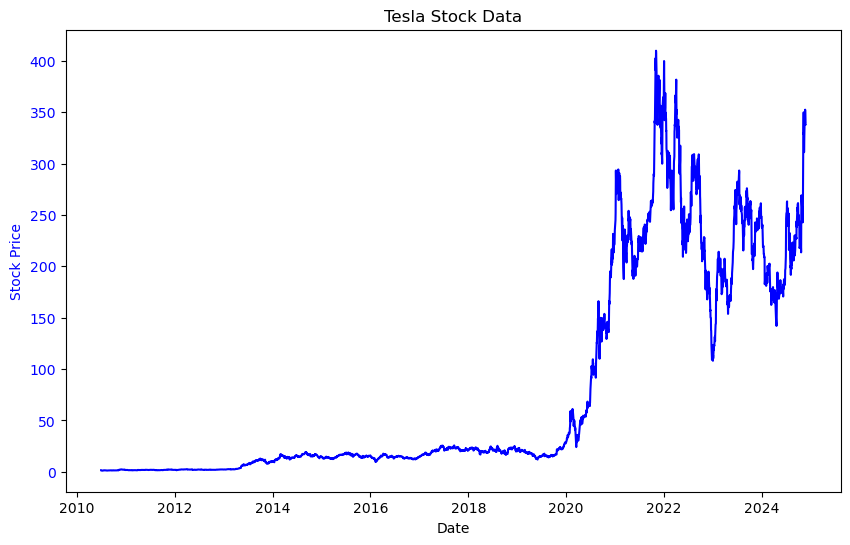

In [8]:
import matplotlib.pyplot as plt

def make_graph(data, revenue, title):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot stock data
    ax1.plot(data['Date'], data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(title)

    plt.show()

# Plot Tesla stock graph
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data')

**Question 6: Plot GameStop Stock Graph**

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

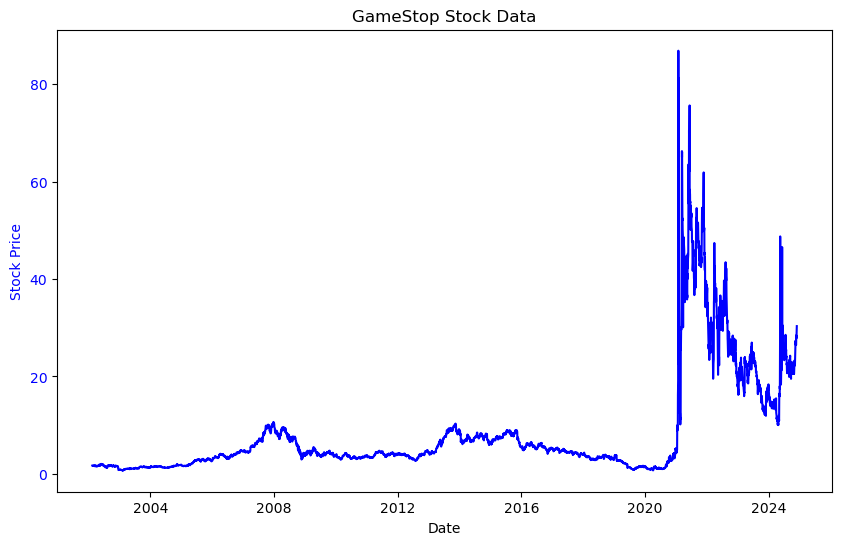

In [9]:
# Plot GameStop stock graph
make_graph(gme_data, gme_revenue, 'GameStop Stock Data')